In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline
sns.set_context('notebook')

In [2]:
from IPython.display import HTML, Javascript, display

def initialize():
    display(HTML(
        '''
            <script>
                code_show = false;
                function restart_run_all(){
                    IPython.notebook.kernel.restart();
                    setTimeout(function(){
                        IPython.notebook.execute_all_cells();
                    }, 10000)
                }
                function code_toggle() {
                    if (code_show) {
                        $('div.input').hide(200);
                    } else {
                        $('div.input').show(200);
                    }
                    code_show = !code_show
                }
            </script>
            <button onclick="code_toggle()">Click to toggle</button>
            <button onclick="restart_run_all()">Click to Restart and Run all Cells</button>
        '''
    ))
initialize()

In [3]:
path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

In [4]:
confirmed_path = "time_series_19-covid-Confirmed.csv"
deaths_path = "time_series_19-covid-Deaths.csv"
recovered_deaths = "time_series_19-covid-Recovered.csv"

In [5]:
confirmed = pd.read_csv(path+confirmed_path)
deaths = pd.read_csv(path+deaths_path)
recoveries = pd.read_csv(path+recovered_deaths)

In [6]:
def clean_data(df,value):
    df = pd.melt(df,id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name=value)
    df['date'] = pd.to_datetime(df['date'])
    
    df['Country'] = np.where(df['Country/Region']=='US','US',
                                    np.where(df['Country/Region']=='Italy','Italy',
                                    np.where(df['Country/Region']=='China','China',
                                    np.where(df['Country/Region'].str.contains('Korea'),'SK',
                                    np.where(df['Country/Region']=='Iran','Iran','Other')))))
    df = df.groupby(['date','Country']).sum()[value].reset_index()
    df['week'] = df['date'].dt.to_period('W')
    return df 

In [7]:
deaths = clean_data(deaths,"Deaths")
confirmed = clean_data(confirmed,"Confirmed Cases")
recoveries = clean_data(recoveries, "Recovered Cases")

In [8]:
def plot_data(df,value): 
    plt.figure(figsize=(24,8))
    sns.pointplot(x='week',y=value,estimator=np.max,hue='Country',ci=None,data=df)
    plt.title(value,size=14)
    plt.xlabel('Week',size=14)
    plt.ylabel(value,size=14)
    
    print(df[['Country','week',value]].groupby(['Country','week']).max())

# Recovered Cases

                               Recovered Cases
Country week                                  
China   2020-01-20/2020-01-26               49
        2020-01-27/2020-02-02              463
        2020-02-03/2020-02-09             3219
        2020-02-10/2020-02-16            10755
        2020-02-17/2020-02-23            23187
        2020-02-24/2020-03-01            42162
        2020-03-02/2020-03-08            57388
        2020-03-09/2020-03-15            67017
        2020-03-16/2020-03-22            70535
Iran    2020-01-20/2020-01-26                0
        2020-01-27/2020-02-02                0
        2020-02-03/2020-02-09                0
        2020-02-10/2020-02-16                0
        2020-02-17/2020-02-23                0
        2020-02-24/2020-03-01              175
        2020-03-02/2020-03-08             2134
        2020-03-09/2020-03-15             4590
        2020-03-16/2020-03-22             5710
Italy   2020-01-20/2020-01-26                0
        2020-

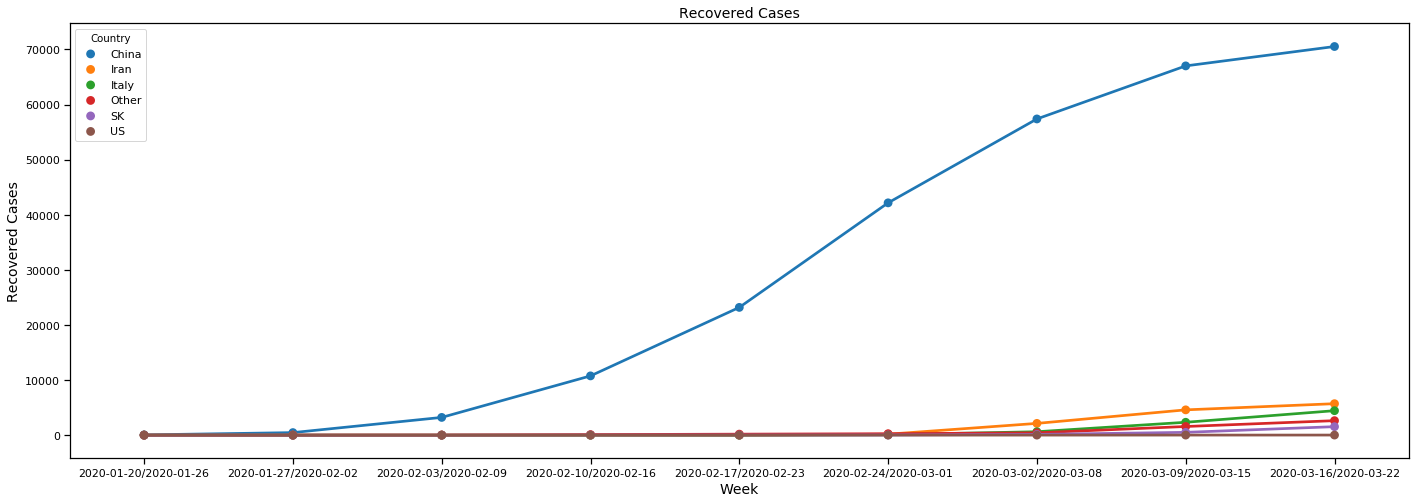

In [9]:
plot_data(df=recoveries,value="Recovered Cases")

# Deaths

                               Deaths
Country week                         
China   2020-01-20/2020-01-26      56
        2020-01-27/2020-02-02     361
        2020-02-03/2020-02-09     905
        2020-02-10/2020-02-16    1766
        2020-02-17/2020-02-23    2445
        2020-02-24/2020-03-01    2872
        2020-03-02/2020-03-08    3100
        2020-03-09/2020-03-15    3203
        2020-03-16/2020-03-22    3249
Iran    2020-01-20/2020-01-26       0
        2020-01-27/2020-02-02       0
        2020-02-03/2020-02-09       0
        2020-02-10/2020-02-16       0
        2020-02-17/2020-02-23       8
        2020-02-24/2020-03-01      54
        2020-03-02/2020-03-08     194
        2020-03-09/2020-03-15     724
        2020-03-16/2020-03-22    1284
Italy   2020-01-20/2020-01-26       0
        2020-01-27/2020-02-02       0
        2020-02-03/2020-02-09       0
        2020-02-10/2020-02-16       0
        2020-02-17/2020-02-23       3
        2020-02-24/2020-03-01      34
        2020

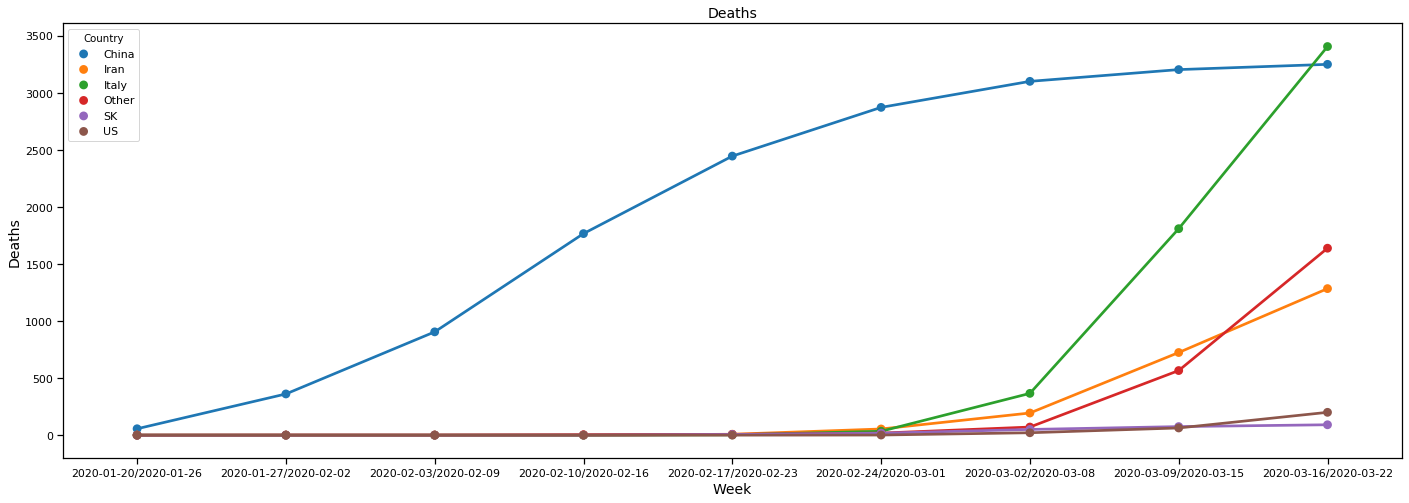

In [10]:
plot_data(df=deaths,value='Deaths')

# Confirmed Cases

                               Confirmed Cases
Country week                                  
China   2020-01-20/2020-01-26             2075
        2020-01-27/2020-02-02            16630
        2020-02-03/2020-02-09            39829
        2020-02-10/2020-02-16            70513
        2020-02-17/2020-02-23            77022
        2020-02-24/2020-03-01            79932
        2020-03-02/2020-03-08            80823
        2020-03-09/2020-03-15            81003
        2020-03-16/2020-03-22            81156
Iran    2020-01-20/2020-01-26                0
        2020-01-27/2020-02-02                0
        2020-02-03/2020-02-09                0
        2020-02-10/2020-02-16                0
        2020-02-17/2020-02-23               43
        2020-02-24/2020-03-01              978
        2020-03-02/2020-03-08             6566
        2020-03-09/2020-03-15            13938
        2020-03-16/2020-03-22            18407
Italy   2020-01-20/2020-01-26                0
        2020-

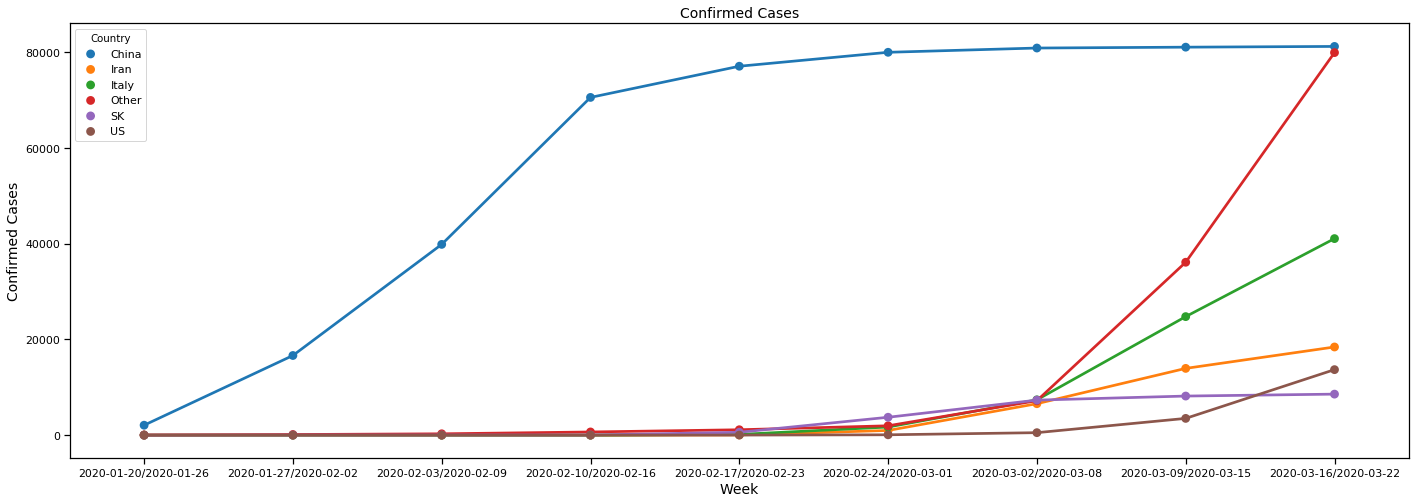

In [11]:
plot_data(df=confirmed,value='Confirmed Cases')

In [12]:
date_100 = confirmed[confirmed['Confirmed Cases']>=100].groupby('Country').min()['date'].reset_index()

In [13]:
date_100.rename(columns={'date':'date_100'},inplace=True)

In [14]:
confirmed = pd.merge(confirmed,date_100,on='Country')

In [15]:
confirmed['days_since_100'] = ((confirmed['date']-confirmed['date_100'])/np.timedelta64(1,'D')).astype(int)

Text(0.5, 1.0, 'Confirmed Cases by Days Since 100th Case')

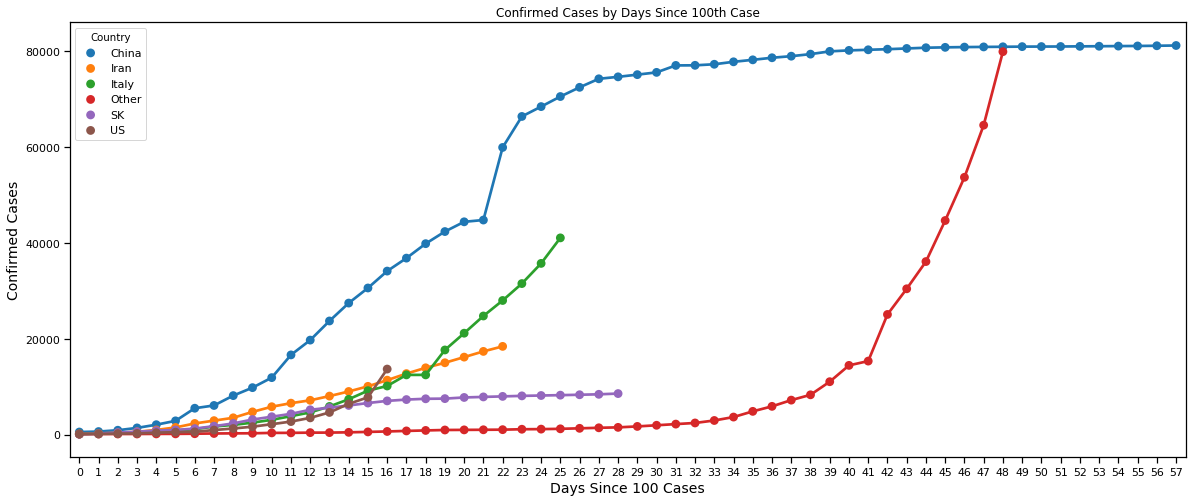

In [16]:
plt.figure(figsize=(20,8))
sns.pointplot(x='days_since_100',
              y='Confirmed Cases',
              hue='Country',
              data=confirmed[confirmed['days_since_100']>=0],
              estimator=np.max,
              ci=None)
plt.xlabel('Days Since 100 Cases',size=14)
plt.ylabel('Confirmed Cases',size=14)
plt.title('Confirmed Cases by Days Since 100th Case')

In [17]:
confirmed.date.max()

Timestamp('2020-03-19 00:00:00')